In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [2]:
# Preprocessing steps as described in exercise 1
train_df = pd.read_csv("data/npf_train.csv")
#train_df = train_df.set_index("date")
train_df = train_df.drop(["partlybad","id"],axis=1)

class2 = np.array(["event"]*train_df.shape[0],dtype="object") 
class2[train_df["class4"]=="nonevent"] = "nonevent" 
train_df.insert(1,'class2', class2)
train_df["class2"] = train_df["class2"].astype("category")
train_df.head()

,date,class2,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,2000-01-01,nonevent,nonevent,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2000-01-20,nonevent,nonevent,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,2000-01-23,nonevent,nonevent,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,2000-02-17,nonevent,nonevent,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,2000-03-25,event,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210


In [3]:
train_df['date']=pd.to_datetime(train_df['date'],format='%Y/%m/%d')

In [4]:
train_df

,date,class2,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,2000-01-01,nonevent,nonevent,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2000-01-20,nonevent,nonevent,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,2000-01-23,nonevent,nonevent,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,2000-02-17,nonevent,nonevent,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,2000-03-25,event,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2011-08-14,nonevent,nonevent,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
454,2011-08-16,nonevent,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
455,2011-08-18,nonevent,nonevent,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391
456,2011-08-21,nonevent,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


In [5]:
nonevent = train_df[train_df["class2"] == 'nonevent']
event = train_df[train_df["class2"] == 'event']

In [6]:
nonevent

,date,class2,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,2000-01-01,nonevent,nonevent,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2000-01-20,nonevent,nonevent,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,2000-01-23,nonevent,nonevent,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,2000-02-17,nonevent,nonevent,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
8,2000-04-25,nonevent,nonevent,381.957090,3.518540,382.097128,3.619476,382.279789,3.466673,382.162789,...,11.590814,4.336933,12.237960,4.541495,10.500483,9.159301,0.428271,0.439836,0.007340,0.003302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2011-08-14,nonevent,nonevent,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
454,2011-08-16,nonevent,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
455,2011-08-18,nonevent,nonevent,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391
456,2011-08-21,nonevent,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


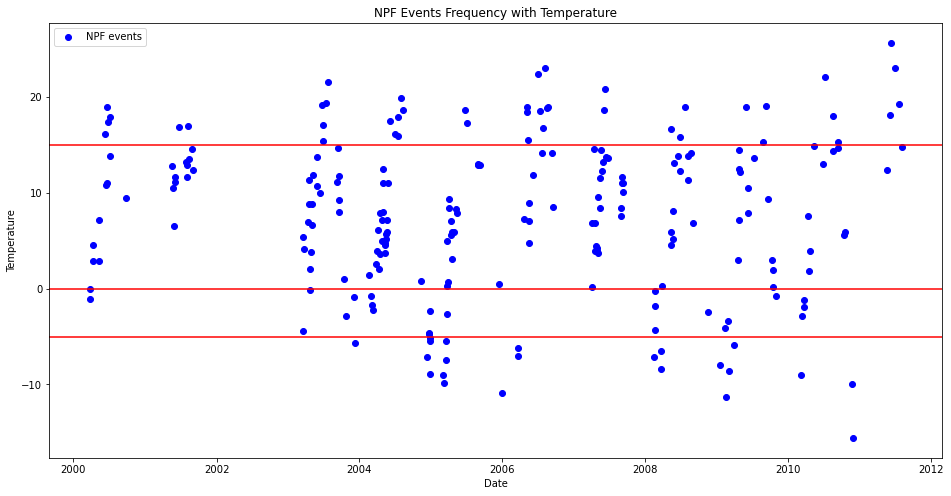

In [7]:
plt.figure(figsize=(16, 8))
#plt.scatter(nonevent['date'],nonevent['T42.mean'],marker = 'o', c = 'b')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('NPF Events Frequency with Temperature')
plt.scatter(event['date'],event['T42.mean'],marker = 'o', c = 'b',label = 'NPF events')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=15, color='r', linestyle='-')
plt.axhline(y=-5, color='r', linestyle='-')
plt.legend()
plt.savefig('Fig/fre',dpi=1080)
plt.show()